In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_vecm = pd.DataFrame()
file = pd.ExcelFile('./vecm_mape.xlsx')
sheet_names = ['Dow Jones', 'CAC 40', 'Dax']
for sheet in sheet_names:
    df_tmp = pd.read_excel(file, sheet_name=sheet)
    df_vecm = df_vecm.append(df_tmp)
file.close()

In [13]:
df_nn = pd.DataFrame()
file = pd.ExcelFile('./nn_mape.xlsx')
sheet_names = ['Dow Jones', 'CAC 40', 'Dax']
for sheet in sheet_names:
    df_tmp = pd.read_excel(file, sheet_name=sheet)
    df_nn = df_nn.append(df_tmp)
file.close()

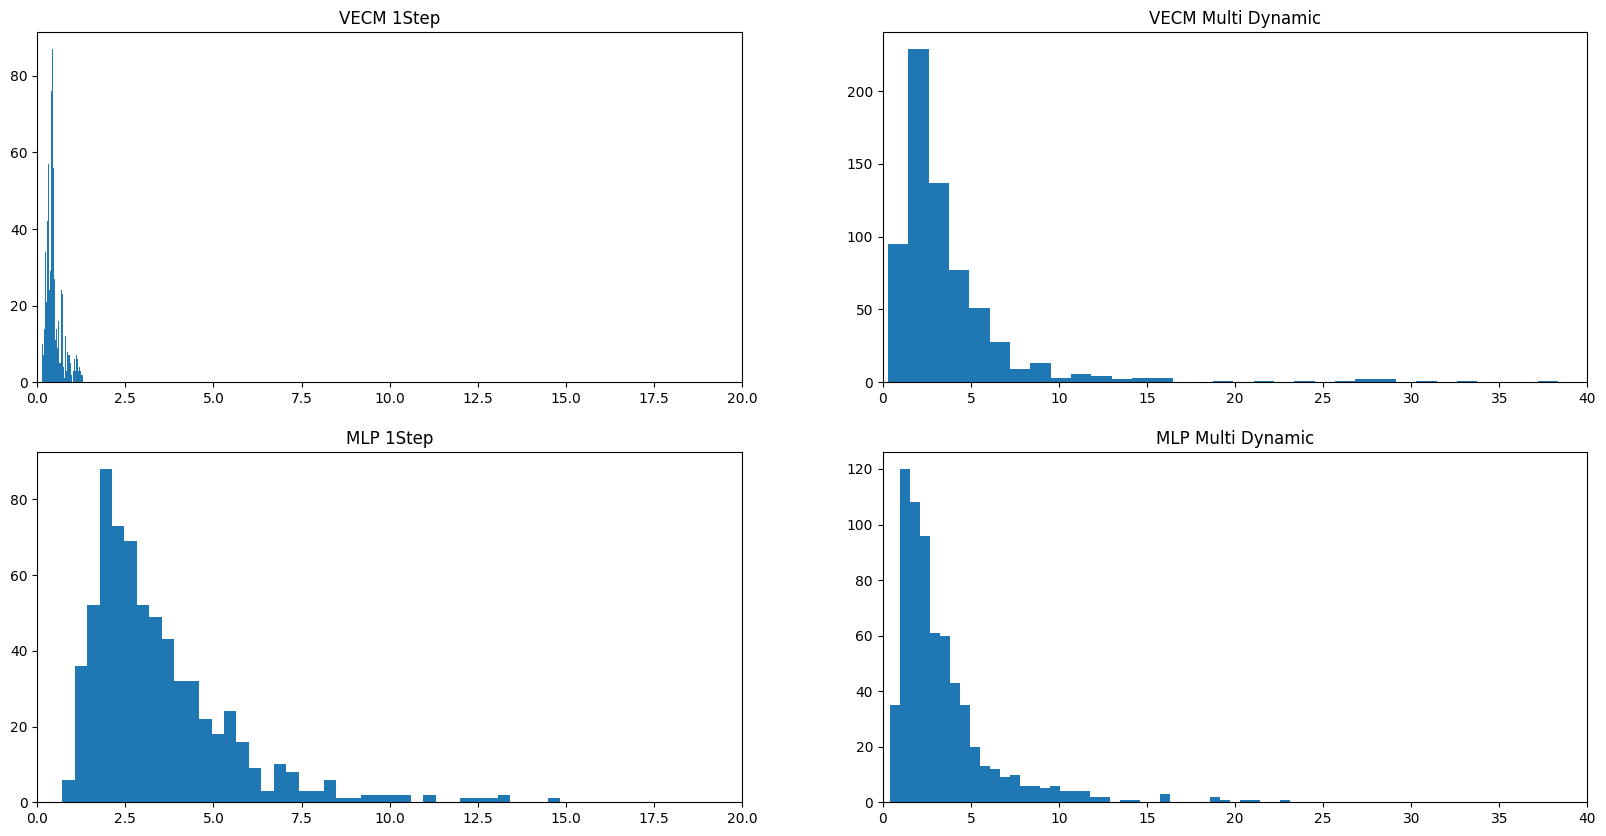

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0, 0].hist(df_vecm[df_vecm.tag=='vecm_1step'].mape, bins=40)
axs[0, 0].set_xlim((0,20))
axs[0, 0].set_title(f'VECM 1Step')

axs[0, 1].hist(df_vecm[df_vecm.tag=='vecm_multi'].mape, bins=40)
axs[0, 1].set_xlim((0,40))
axs[0, 1].set_title(f'VECM Multi Dynamic')

axs[1, 0].hist(df_nn[df_nn.tag=='nn_1step'].mape, bins=40)
axs[1, 0].set_xlim((0,20))
axs[1, 0].set_title(f'MLP 1Step')

axs[1, 1].hist(df_nn[df_nn.tag=='nn_multi'].mape, bins=40)
axs[1, 1].set_xlim((0,40))
axs[1, 1].set_title(f'MLP Multi Dynamic')

fig.savefig(rf'./vecm_vs_nn.png');